In [1]:
import numpy as np
import imageio
from collections import defaultdict
import matplotlib.pyplot as plt

In [20]:
class Simulation:
    def __init__(self, L=100, max_height=4, max_iters=50000, iters_per_frame=100, init_random=True):
        self.L = L
        self.max_height = max_height
        self.max_iters = max_iters
        self.iters_per_frame = iters_per_frame

        if init_random:
            self.grid = np.random.choice((range(self.max_height)), size=(self.L, self.L))
        else:
            self.grid = np.zeros((self.L, self.L))
        self.history = []
        self.avalanches_count = defaultdict(lambda: 0)
        
    def add_grain_bfs(self, i, j, visited):
        if (i not in range(self.L) or
            j not in range(self.L) or
                (i, j) in visited):
            return

        self.grid[i, j] += 1
        visited.add((i, j))

        if self.grid[i, j] == self.max_height:
            for di, dj in [[1, 0], [-1, 0], [0, 1], [0, -1]]:
                self.add_grain_bfs(i + di, j + dj, visited)
            self.grid[i, j] = 0
            
    def run(self):
        for t in range(self.max_iters):
            if t % self.iters_per_frame == 0:
                self.history.append(self.grid.copy())

            i, j = np.random.randint(low=0, high=self.L, size=2)

            visited = set()
            self.add_grain_bfs(i, j, visited)

            if visited:
                self.avalanches_count[len(visited)] += 1

        return self.history, self.avalanches_count
    
    def save_gif(self, output_file):
        with imageio.get_writer(output_file) as writer:
            for image in self.history:
                writer.append_data((image * 255).astype(np.uint8))
    
    def plot_avalanches(self):
        x = np.array([int(size) for size in self.avalanches_count.keys()])
        y = np.array([int(size) for size in self.avalanches_count.values()])

        plt.scatter(np.log(x), np.log(y))
        plt.show()

In [ ]:
s0 = Simulation(init_random=False)

s0.run()

s0.save_gif("s0.gif")

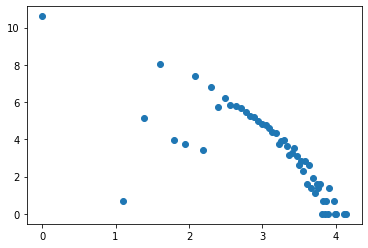

In [23]:
s0.plot_avalanches()

<img src="https://raw.githubusercontent.com/zbsss/complex-systems/main/lab1/s0.gif" style="image-rendering: crisp-edges;" alt="gif" width="500" height="500" />

In [ ]:
s1 = Simulation()

s1.run()

s1.save_gif("s1.gif")

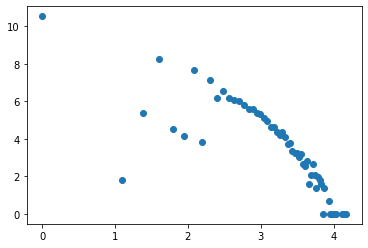

In [27]:
s1.plot_avalanches()

<img src="https://raw.githubusercontent.com/zbsss/complex-systems/main/lab1/s1.gif" style="image-rendering: crisp-edges;" alt="gif" width="500" height="500" />

In [ ]:
s2 = Simulation(L=500, max_iters=1000000, max_height=5, iters_per_frame=1000)

s2.run()

s2.save_gif("s2.gif")

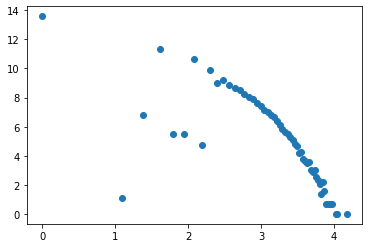

In [28]:
s2.plot_avalanches()

<img src="https://raw.githubusercontent.com/zbsss/complex-systems/main/lab1/s2.gif" style="image-rendering: crisp-edges;" alt="gif" width="500" height="500" />